<a href="https://colab.research.google.com/github/estebanmgr/Incendios_Forestales/blob/main/Predicci%C3%B3n_de_incendios_forestales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Incendios en algeria

La finalidad de este proyecto es predecir la ocurrencia de incendios forestales basandose en datasets historicos de incendios ocurridos en Algeria.

# Análisis exploratorio


## Importando las librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import os
from warnings import simplefilter
simplefilter(action="ignore", category=FutureWarning)

## Importando los dataset

Una vez importado el dataset, se puede observar que tiene adjunto dos sets de datos (Algeria y Abbes), con lo cual se procede a dividirlo en dos.

In [ ]:
df_algeria = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv", nrows=122, header=1)
df_algeria.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


Se toman en cuenta solo las primeras 122 filas, ya que luego empieza otro dataset que se importará a continuación.

In [ ]:
df_abbes = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv", skiprows=126)
df_abbes.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


## Data wrangling

Se comprueban las dimensiones de los datasets y se observan las estadisticas de ambos.

In [ ]:
print(df_algeria.shape)
print(df_abbes.shape)

(122, 14)
(122, 14)


In [ ]:
df_algeria.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
std,8.843274,1.115259,0.0,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000
50%,16.000000,7.500000,2012.0,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000
75%,23.000000,8.000000,2012.0,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


De estas estadisticas se obtienen los siguientes datos:
* No hay valores faltantes en ninguna de las columnas.
* La media de temperaturas en la zona (y en los meses en los que se hizo el estudio) es de 31ºC (algo a tomar en cuenta para cuando se analicen las temperaturas medias en las que se registran incendios).
* La columna de "Rain" tiene muchos valores en 0 o cercanos a 0, con lo cual hay que ver la posibilidad de eliminarla del conjunto de variables a la hora de hacer el estudio.

In [ ]:
df_abbes.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,33.163934,55.901639,15.008197,0.678689,81.102459,17.031967,5.892623,17.903279
std,8.843274,1.115259,0.0,3.675608,15.716186,2.692186,1.486759,12.244064,12.995068,4.832913,13.878868
min,1.000000,6.000000,2012.0,24.000000,21.000000,6.000000,0.000000,37.900000,0.900000,0.100000,1.400000
25%,8.000000,7.000000,2012.0,30.000000,43.250000,14.000000,0.000000,77.650000,7.325000,1.825000,7.400000
50%,16.000000,7.500000,2012.0,34.000000,56.000000,15.000000,0.000000,84.850000,13.150000,4.600000,13.900000
75%,23.000000,8.000000,2012.0,36.000000,66.750000,16.750000,0.475000,89.275000,22.900000,8.625000,23.875000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,8.700000,96.000000,65.900000,19.000000,68.000000


Al generar las estadisticas del dataset de Abbes se evidenció que faltaban columnas, con lo cual se procede a hacer un análisis exploratorio de los datos para determinar la razón.



In [ ]:
pd.isnull(df_algeria).sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [ ]:
pd.isnull(df_abbes).sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

Se corrobora que solo hay un valor faltante en el dataset de Abbes y es en la columna "Classes".

In [ ]:
print (df_algeria.columns)
print (df_abbes.columns)

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')
Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')


In [ ]:
df_algeria.columns = ['Day', 'Month', 'Year', 'Temperature', 'RH', 'WS', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [ ]:
df_abbes.columns = ['Day', 'Month', 'Year', 'Temperature', 'RH', 'WS', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

Se unifican los nombres de las columnas de ambos datasets para que después sea más sencillo llamar a las columnas de datos.

In [ ]:
df_algeria["Classes"].value_counts()

not fire       60
fire           53
fire            4
not fire        2
fire            2
not fire        1
Name: Classes, dtype: int64

In [ ]:
df_abbes["Classes"].value_counts()

fire             78
not fire         41
not fire          1
not fire          1
Name: Classes, dtype: int64

Al igual que con los nombres de las columnas, se puede ver que existen varios formatos para la columna de "Classes", con lo cual se procede a unificarlos, no sin antes rellenar el valor faltante en el df_Abbes.

In [ ]:
df_abbes = df_abbes.fillna("fire")

In [ ]:
pd.unique(df_algeria["Classes"])

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire '],
      dtype=object)

In [ ]:
pd.unique(df_abbes["Classes"])

array(['not fire   ', 'fire   ', 'not fire     ', 'fire', 'not fire    '],
      dtype=object)

In [ ]:
df_algeria["Classes"] = df_algeria["Classes"].replace(["not fire   ", "not fire ", "fire   ","fire " , "fire ","not fire "], ["not fire", "not fire","fire","fire", "fire", "not fire"])

In [ ]:
df_abbes["Classes"] = df_abbes["Classes"].replace(["not fire   ", "not fire     ", "fire   ","not fire    "], ["not fire", "not fire","fire","not fire"])

In [ ]:
df_algeria.dtypes

Day              int64
Month            int64
Year             int64
Temperature      int64
RH               int64
WS               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [ ]:
df_abbes.dtypes

Day              int64
Month            int64
Year             int64
Temperature      int64
RH               int64
WS               int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
dtype: object

Se comprueba el tipo de datos de ambos DataSets y se observa que hay 3 columnas en las que son de tipo "objeto", con lo cual hay que modificarlas para que sean "int" o "float" (en ninguna de esas columnas debería haber un valor tipo objeto).

In [ ]:
df_abbes.loc[df_abbes['FWI'] == 'fire   ', 'FWI'] = '5.5'

In [ ]:
df_abbes.loc[df_abbes['DC'] == 'fire   ', 'DC'] = '53'

In [ ]:
df_abbes.DC = df_abbes.DC.replace({"14.6 9":14.6})

In [ ]:
df_abbes["FWI"] =df_abbes["FWI"].astype("str")

In [ ]:
df_abbes["DC"] =df_abbes["DC"].astype("float64")

In [ ]:
df_abbes["FWI"] = df_abbes["FWI"].astype("float64")

El criterio utilizado para rellenar dichos datos es con el valor medio del dataset de Algeria.

In [ ]:
df_algeria = df_algeria.drop(columns=["Year","Day"])
df_algeria.head()

,Month,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [ ]:
df_abbes = df_abbes.drop(columns=["Year","Day"])
df_abbes.head()

,Month,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,6,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,6,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,6,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,6,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,6,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


Se eliminan las columnas de "Día" y "Año" ya que no aportan  información relevante.

In [ ]:
df_algeria.describe()

,Month,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,7.500000,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
std,1.115259,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051
min,6.000000,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,7.000000,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000
50%,7.500000,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000
75%,8.000000,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000
max,9.000000,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


In [ ]:
df_abbes.describe()

,Month,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,7.500000,33.163934,55.901639,15.008197,0.678689,81.102459,17.031967,45.415574,5.892623,17.903279,8.480328
std,1.115259,3.675608,15.716186,2.692186,1.486759,12.244064,12.995068,42.927562,4.832913,13.878868,8.140163
min,6.000000,24.000000,21.000000,6.000000,0.000000,37.900000,0.900000,7.300000,0.100000,1.400000,0.000000
25%,7.000000,30.000000,43.250000,14.000000,0.000000,77.650000,7.325000,14.700000,1.825000,7.400000,0.925000
50%,7.500000,34.000000,56.000000,15.000000,0.000000,84.850000,13.150000,31.500000,4.600000,13.900000,5.950000
75%,8.000000,36.000000,66.750000,16.750000,0.475000,89.275000,22.900000,56.975000,8.625000,23.875000,13.650000
max,9.000000,42.000000,90.000000,29.000000,8.700000,96.000000,65.900000,177.300000,19.000000,68.000000,31.100000


In [ ]:
colnames= df_algeria.columns
predictors = colnames[:-1]
target = colnames[-1]
X_algeria, X_abbes = df_algeria[predictors], df_abbes[predictors]
Y_algeria, Y_abbes = df_algeria[target], df_abbes[target]

Se separan las variables dependientes de las independientes para hacer representaciones gráficas de los datos.

## Representaciones gráficas de los datos

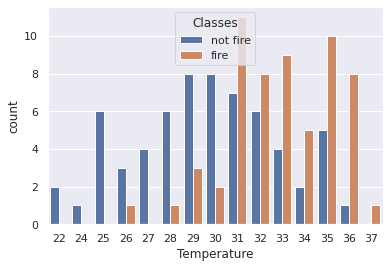

In [ ]:
sns.countplot(df_algeria["Temperature"], hue=(df_algeria["Classes"]))

Como era de esperar, cuanto mayor sea la temperatura, existe una mayor probabilidad de que se produzca un incendio.

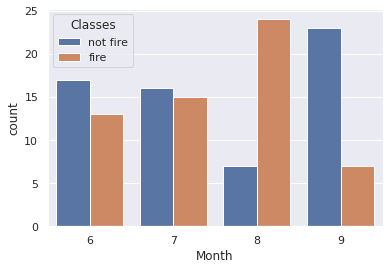

In [ ]:
sns.countplot(df_algeria["Month"], hue=(df_algeria["Classes"]))

En en el més de septiembre es cuando menos incendios se registraron.

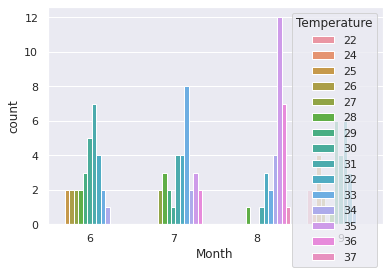

In [ ]:
sns.countplot(df_algeria["Month"], hue=(df_algeria["Temperature"]))

Agosto fue el mes donde se registraron mayores cantidades de incendios y donde las temperaturas fueron más elevadas y de manera más constantes.

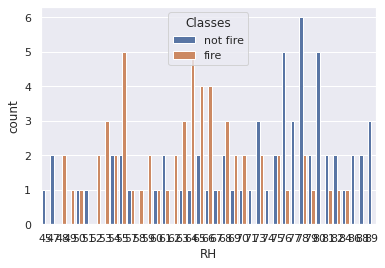

In [ ]:
sns.countplot(df_algeria["RH"], hue=(df_algeria["Classes"]))

Se observa que a medida que el indice de "RH"(Humedad relativa) aumenta, la cantidad de incendios va disminuyendo, lo cual es lógico, ya que al haber más humedad en el ambiente significa que existe una menor probabilidad de incendios.

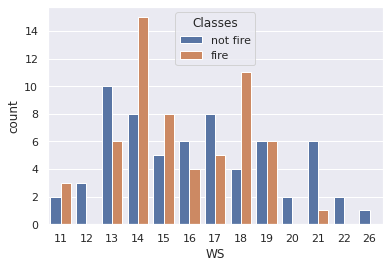

In [ ]:
sns.countplot(df_algeria["WS"], hue=(df_algeria["Classes"]))

Se puede observar, que los valores extremos de la columna "WS"(Velocidad del viento) afectan en la cantidad de incendios que han ocurrido. La mayoría de los incendios se han registrado con velocidades entre 13 y 19.

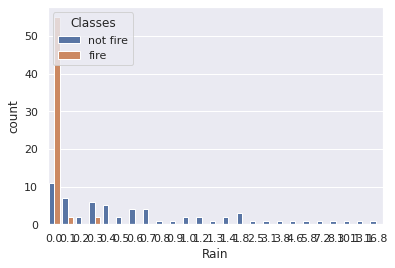

In [ ]:
sns.countplot(df_algeria["Rain"], hue=(df_algeria["Classes"]))

Como era de esperarse, la mayor cantidad de incendios se producen cuando no se registraron lluvias.

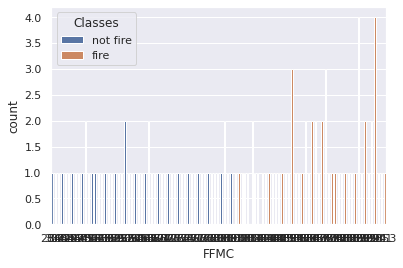

In [ ]:
sns.countplot(df_algeria["FFMC"], hue=(df_algeria["Classes"]))

Se observa que el valor de FFMC es directamente proporcional a la ocurrencia de incendios; a medida que éste valor aumenta, la cantidad de incendios aumenta también.

"The Fine Fuel Moisture Code (FFMC)" Codigo de humedad de combustibles finos" 

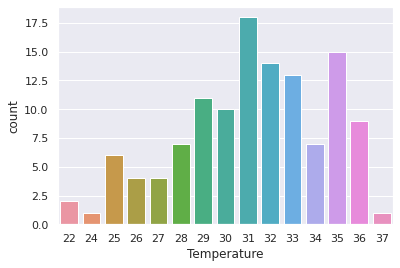

In [ ]:
sns.countplot(df_algeria["Temperature"])

Aquí se muestra nuevamente la distribución unicamente de las temperaturas registradas.

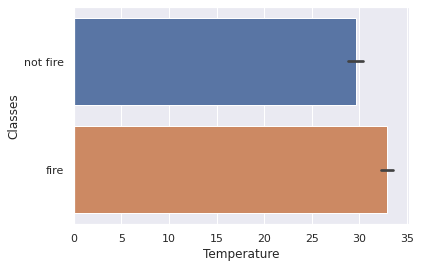

In [ ]:
sns.barplot(x="Temperature", y = "Classes",data=df_algeria)

## Transformando variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df_algeria["Classes"] = label_encoder.fit_transform(df_algeria.iloc[:,-1].values)

In [ ]:
df_abbes["Classes"] = label_encoder.fit_transform(df_abbes.iloc[:,-1].values)

In [ ]:
df_abbes["Classes"] = df_abbes["Classes"].astype("int64")

In [ ]:
print(df_algeria.shape)
print(df_abbes.shape)

(122, 12)
(122, 12)


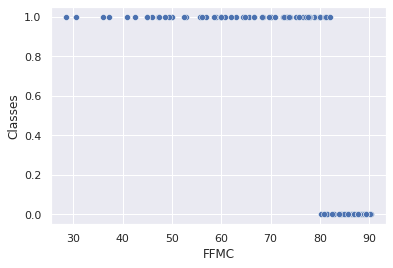

In [ ]:
sns.scatterplot(x=df_algeria["FFMC"], y=df_algeria["Classes"])

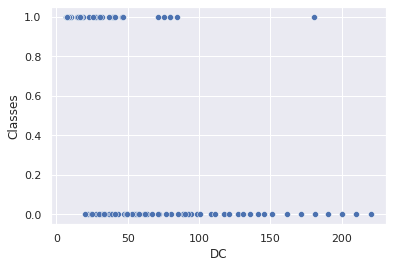

In [ ]:
sns.scatterplot(x=df_algeria["DC"],y=df_algeria["Classes"])

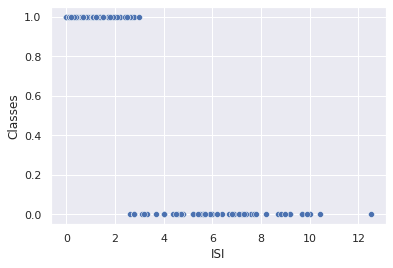

In [ ]:
sns.scatterplot(x=df_algeria["ISI"],y=df_algeria["Classes"])

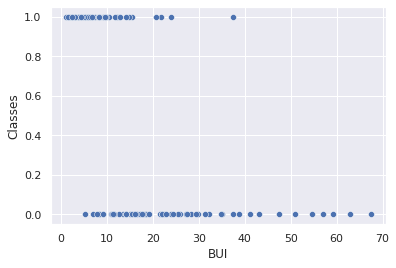

In [ ]:
sns.scatterplot(x=df_algeria["BUI"],y=df_algeria["Classes"])

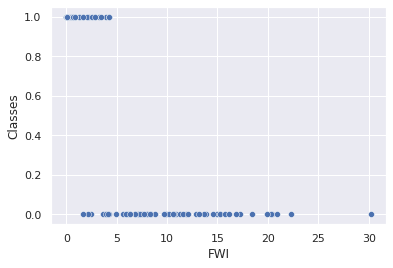

In [ ]:
sns.scatterplot(x=df_algeria["FWI"],y=df_algeria["Classes"])

## Dividiendo el dataset

Se divide el dataset en conjunto de entrenamiento y testing para entrenar los modelos predictivos.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_algeria, Y_algeria, test_size = 0.3, random_state = 0)

# Aplicando modelos de Machine Learning

Se hace un bucle para probar varios modelos de clasificación y determinar su precisión.

In [ ]:
def models (X_train, y_train):
    #Utilizando el modelo de regresión logística
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Utilizando el método de KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    
    #Utilizando el método de SVM
    from sklearn.svm import SVC
    svc = SVC(kernel = "linear", random_state=0)
    svc.fit(X_train,y_train)
    
    #Utilizando el método de SVM
    from sklearn.svm import SVC
    svcsigmoid = SVC(kernel = "sigmoid", random_state=0)
    svcsigmoid.fit(X_train,y_train)
    
    #Utilizando el método de SVM
    from sklearn.svm import SVC
    svcrbf = SVC(kernel = "rbf", random_state=0)
    svcrbf.fit(X_train,y_train)

    #Utilizando el método de SVM
    from sklearn.svm import SVC
    svcpoly = SVC(kernel = "poly",degree=3, random_state=0)
    svcpoly.fit(X_train,y_train)

    #Utilizando el método de Naive bayes
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb.fit(X_train,y_train)
    
    #Utilizando el decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = "entropy", random_state=0)
    tree.fit(X_train, y_train)
    
    #utilizndo el modelo de Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state=0)
    forest.fit (X_train, y_train)

    #Imprimir la pressición de los modelos de clasificación
    print ("[0], Precisión de la Regresión logistica: ", log.score (X_train, y_train))
    print ("[1], Precisión de Nearest neighbors: ", knn.score (X_train, y_train))
    print ("[2], Precisión de Suport vector machine linear: ", svc.score (X_train, y_train))
    print ("[3], Precisión de Suport vector machine sigmoide: ", svcsigmoid.score (X_train, y_train))
    print ("[4], Precisión de Suport vector machine rbf: ", svcrbf.score (X_train, y_train))
    print ("[5], Precisión de Suport vector machine Poly: ", svcpoly.score (X_train, y_train))
    print ("[6], Precisión de  Naive bayes: ", nb.score (X_train, y_train))
    print ("[7], Precisión del Arbol de decisiones: ", tree.score (X_train, y_train))
    print ("[8], Precisión de Random forest: ", forest.score (X_train, y_train))
    
    return log, knn, svc, svcsigmoid, svcrbf, svcpoly, nb, tree, forest

models = models(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0], Precisión de la Regresión logistica:  1.0
[1], Precisión de Nearest neighbors:  0.9176470588235294
[2], Precisión de Suport vector machine linear:  1.0
[3], Precisión de Suport vector machine sigmoide:  0.788235294117647
[4], Precisión de Suport vector machine rbf:  0.8352941176470589
[5], Precisión de Suport vector machine Poly:  0.9647058823529412
[6], Precisión de  Naive bayes:  0.9647058823529412
[7], Precisión del Arbol de decisiones:  1.0
[8], Precisión de Random forest:  1.0


Se puede observar que los métodos que tienen una mayor precisión son:
* Regresión Logística
* Suport Vector Machine (Modelo lineal)
* Arbol de decisiones
* Random Forest
* Naive bayes
* Nearest neighbors

Organizados de manera descendiente de mayor a menor precisión.

Se aplica una matriz de confusión para corroborar la precisión de los algoritmos.

# Probando el modelo

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
for i in range(len(models)):
    cm = confusion_matrix(y_test, models[i].predict(X_test))
    
    TN, FP, FN, TP = confusion_matrix(y_test, models[i].predict(X_test)).ravel()
    
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    print (cm)
    print("Model[{}] Testing accuracy = '{}'". format(i, test_score))

[[19  0]
 [ 0 18]]
Model[0] Testing accuracy = '1.0'
[[18  1]
 [ 3 15]]
Model[1] Testing accuracy = '0.8918918918918919'
[[19  0]
 [ 1 17]]
Model[2] Testing accuracy = '0.972972972972973'
[[17  2]
 [ 6 12]]
Model[3] Testing accuracy = '0.7837837837837838'
[[18  1]
 [ 2 16]]
Model[4] Testing accuracy = '0.918918918918919'
[[18  1]
 [ 0 18]]
Model[5] Testing accuracy = '0.972972972972973'
[[18  1]
 [ 0 18]]
Model[6] Testing accuracy = '0.972972972972973'
[[18  1]
 [ 0 18]]
Model[7] Testing accuracy = '0.972972972972973'
[[18  1]
 [ 0 18]]
Model[8] Testing accuracy = '0.972972972972973'


De aquí se evidencia lo cercano que fue el modelo a la hora de predecir los resultados con datos que no ha utilizado antes (conjunto de evaluación).

Se utiliza el df_abbes entero para evaluar el modelo con datos de otra zona distinta y que el modelo no conoce para así determinar su eficacia al predecir la ocurrencia de un incendio.

In [ ]:
for i in range(len(models)):
    cm = confusion_matrix(Y_abbes, models[i].predict(X_abbes))
    
    TN, FP, FN, TP = confusion_matrix(Y_abbes, models[i].predict(X_abbes)).ravel()
    
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    print (cm)
    print("Model[{}] Testing accuracy = '{}'". format(i, test_score))

[[72  7]
 [ 1 42]]
Model[0] Testing accuracy = '0.9344262295081968'
[[67 12]
 [ 4 39]]
Model[1] Testing accuracy = '0.8688524590163934'
[[70  9]
 [ 2 41]]
Model[2] Testing accuracy = '0.9098360655737705'
[[70  9]
 [19 24]]
Model[3] Testing accuracy = '0.7704918032786885'
[[67 12]
 [ 4 39]]
Model[4] Testing accuracy = '0.8688524590163934'
[[66 13]
 [ 2 41]]
Model[5] Testing accuracy = '0.8770491803278688'
[[71  8]
 [ 2 41]]
Model[6] Testing accuracy = '0.9180327868852459'
[[74  5]
 [ 0 43]]
Model[7] Testing accuracy = '0.9590163934426229'
[[75  4]
 [ 0 43]]
Model[8] Testing accuracy = '0.9672131147540983'


Como se observa en los resultados obtenidos, la exactitud del modelo ha disminuido con datos que nunca ha procesado.

Se observa que los modelos más exactos son:
* Regresión Logística
* Arbol de decisiones
* Random Forest

Solo por corroborar, se utilizan todos los datos enteros para entrenar el modelo y así determinar nuevamente la exactitud de los mismos.

In [ ]:
def models (X_abbes, Y_abbes):
    #Utilizando el modelo de regresión logística
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_abbes, Y_abbes)
    
    #Utilizando el método de KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(X_abbes, Y_abbes)
    
    #Utilizando el método de SVM
    from sklearn.svm import SVC
    svc = SVC(kernel = "linear", random_state=0)
    svc.fit(X_abbes, Y_abbes)
    
    #Utilizando el método de SVM
    from sklearn.svm import SVC
    svcsigmoid = SVC(kernel = "sigmoid", random_state=0)
    svcsigmoid.fit(X_abbes, Y_abbes)
    
    #Utilizando el método de SVM
    from sklearn.svm import SVC
    svcrbf = SVC(kernel = "rbf", random_state=0)
    svcrbf.fit(X_abbes, Y_abbes)

    #Utilizando el método de SVM
    from sklearn.svm import SVC
    svcpoly = SVC(kernel = "poly",degree=3, random_state=0)
    svcpoly.fit(X_abbes, Y_abbes)

    #Utilizando el método de Naive bayes
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb.fit(X_abbes, Y_abbes)
    
    #Utilizando el decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = "entropy", random_state=0)
    tree.fit(X_abbes, Y_abbes)
    
    #utilizndo el modelo de Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state=0)
    forest.fit (X_abbes, Y_abbes)

    #Imprimir la pressición de los modelos de clasificación
    print ("[0], Precisión de la Regresión logistica: ", log.score (X_abbes, Y_abbes))
    print ("[1], Precisión de Nearest neighbors: ", knn.score (X_abbes, Y_abbes))
    print ("[2], Precisión de Suport vector machine linear: ", svc.score (X_abbes, Y_abbes))
    print ("[3], Precisión de Suport vector machine sigmoide: ", svcsigmoid.score (X_abbes, Y_abbes))
    print ("[4], Precisión de Suport vector machine rbf: ", svcrbf.score (X_abbes, Y_abbes))
    print ("[5], Precisión de Suport vector machine Poly: ", svcpoly.score (X_abbes, Y_abbes))
    print ("[6], Precisión de  Naive bayes: ", nb.score (X_abbes, Y_abbes))
    print ("[7], Precisión del Arbol de decisiones: ", tree.score (X_abbes, Y_abbes))
    print ("[8], Precisión de Random forest: ", forest.score (X_abbes, Y_abbes))
    
    return log, knn, svc, svcsigmoid, svcrbf, svcpoly, nb, tree, forest

models = models(X_algeria, Y_abbes)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0], Precisión de la Regresión logistica:  0.7704918032786885
[1], Precisión de Nearest neighbors:  0.7377049180327869
[2], Precisión de Suport vector machine linear:  0.7459016393442623
[3], Precisión de Suport vector machine sigmoide:  0.6475409836065574
[4], Precisión de Suport vector machine rbf:  0.7213114754098361
[5], Precisión de Suport vector machine Poly:  0.7295081967213115
[6], Precisión de  Naive bayes:  0.6885245901639344
[7], Precisión del Arbol de decisiones:  1.0
[8], Precisión de Random forest:  0.9508196721311475


In [ ]:
for i in range(len(models)):
    cm = confusion_matrix(Y_abbes, models[i].predict(X_abbes))
    
    TN, FP, FN, TP = confusion_matrix(Y_abbes, models[i].predict(X_abbes)).ravel()
    
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    print (cm)
    print("Model[{}] Testing accuracy = '{}'". format(i, test_score))

[[72  7]
 [29 14]]
Model[0] Testing accuracy = '0.7049180327868853'
[[69 10]
 [20 23]]
Model[1] Testing accuracy = '0.7540983606557377'
[[61 18]
 [25 18]]
Model[2] Testing accuracy = '0.6475409836065574'
[[79  0]
 [43  0]]
Model[3] Testing accuracy = '0.6475409836065574'
[[79  0]
 [29 14]]
Model[4] Testing accuracy = '0.7622950819672131'
[[79  0]
 [30 13]]
Model[5] Testing accuracy = '0.7540983606557377'
[[72  7]
 [ 6 37]]
Model[6] Testing accuracy = '0.8934426229508197'
[[68 11]
 [17 26]]
Model[7] Testing accuracy = '0.7704918032786885'
[[77  2]
 [24 19]]
Model[8] Testing accuracy = '0.7868852459016393'


Se observa como después de haber entrenado los modelos con los datos de Abbes, la exactitud del modelo ha subido considerablemente sobre todo en los algoritmos de:
* Random forest
* Arbol de decisiones

# Referencias

Datos obtenidos de la página web: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

Faroudja ABID et al. , â€œPredicting Forest Fire in Algeria using Data Mining Techniques: Case Study of the Decision Tree Algorithmâ€, International Conference on Advanced Intelligent Systems for Sustainable Development (AI2SD 2019) , 08 - 11 July , 2019, Marrakech, Morocco